# Overview of seaborn plotting functions

## Similar functions for similar tasks

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
plt.style.use('seaborn-ticks')
%matplotlib inline

In [7]:
penguins = sns.load_dataset("penguins")
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


<AxesSubplot:xlabel='flipper_length_mm', ylabel='Count'>

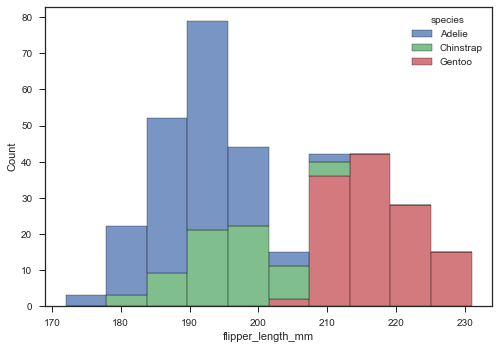

In [8]:
sns.histplot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack")

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Density'>

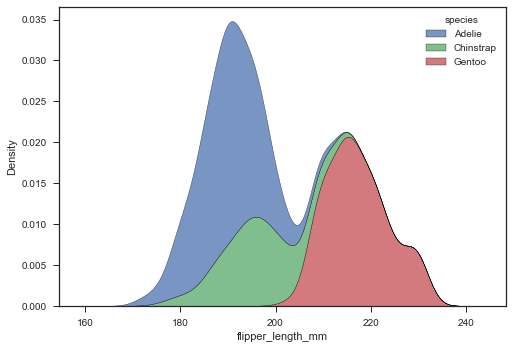

In [9]:
sns.kdeplot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack")

## Figure-level vs. axes-level functions

    “axes-level”: 如上图的 histplot()，kdeplot()
    “figure-level”: 如下面的displot(), FacetGrid()

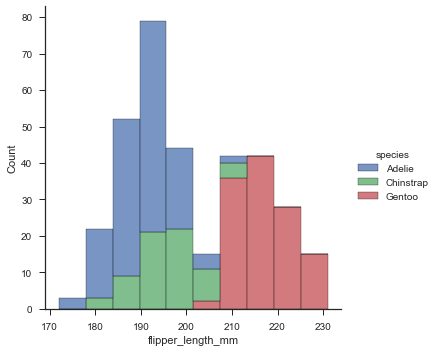

In [10]:
# 例如 displot()就是figure-level function，其默认行为是绘制一个直方图，效果同histplot()
sns.displot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack")

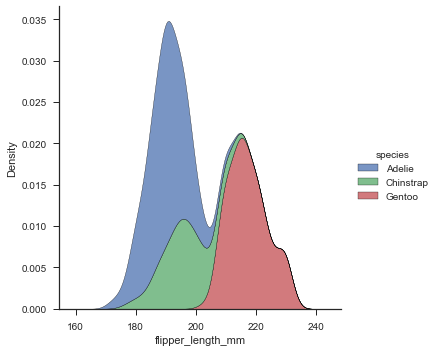

In [11]:
# 要改为使用与 kdeplot（） 相同的代码绘制核密度图，请使用 kind 参数选择它：
sns.displot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack", kind="kde")

    figure-level 看起来很像他们的 axis-level，但他们存在一些不同，注意到legend在figure-level是在plot的外面的，并且他们的形状稍微不同

    figure-level最有用的特点是可以绘制multiplot subplots。例如，除了像上图那样将每种企鹅的直方图绘制在同一axes中，我们可以将他们'facet'到同一figure的不同的axes中。

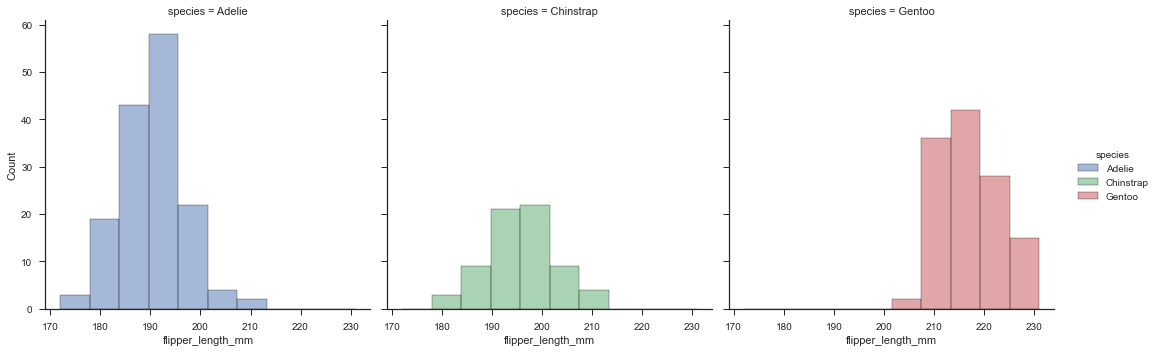

In [12]:
sns.displot(data=penguins, x="flipper_length_mm", hue="species", col="species")

    figure-level function打包他们的axes-level的counterparts，并且传递相同的kind-specific keyword给function。这意味着他们的灵活性减少了，但有个缺点：特定于类型的参数不会出现在函数签名或文档字符串中。它们的某些功能可能不太容易被发现，您可能需要查看文档的两个不同页面，然后才能了解如何实现特定目标。

### Axes-level functions make self-contained plots

    axes-level function被编写为类似于 matplotlib 函数的直接替换。虽然它们会自动添加轴标签和图例，但它们不会修改绘制到的轴以外的任何内容。这意味着它们可以组成任意复杂的matplotlib figure，并具有可预测的结果。

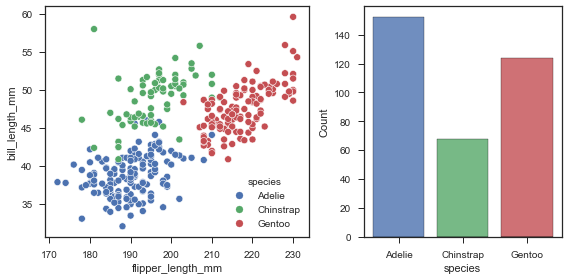

In [13]:
f, axs = plt.subplots(1, 2, figsize=(8, 4), gridspec_kw=dict(width_ratios=[4, 3]))
sns.scatterplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species", ax=axs[0])
sns.histplot(data=penguins, x="species", hue="species", shrink=.8, alpha=.8, legend=False, ax=axs[1])
f.tight_layout()

### Figure-level functions own their figure

    相反，figure-level不能（很容易）与其他图形组合在一起。根据设计，他们“拥有”自己的图形，包括其初始化，因此没有使用figure-level function将图形绘制到现有轴上的概念。此约束允许figure-level function实现诸如将legend放在绘图之外之类的功能。

    尽管如此，通过访问它们返回的对象上的 matplotlib axes并以这种方式向绘图中添加其他元素，可以超越图形级函数提供的功能：

(0.0, 10.45)

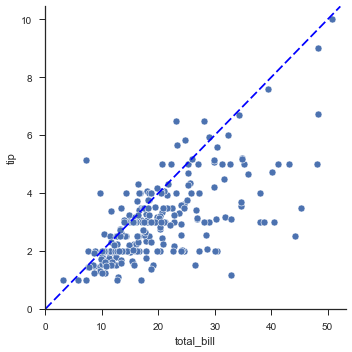

In [23]:
tips = sns.load_dataset("tips")
g = sns.relplot(data=tips, x="total_bill", y="tip")
g.ax.axline(xy1=(10, 2), slope=.2, color="b", dashes=(5, 2))
g.ax.set_xlim(0)
g.ax.set_ylim(0)

### Customizing plots from a figure-level function

    figure-level函数返回FacetGrid实例，该实例具有一些用于以“智能”的方式自定义绘图属性的方法。例如，可以使用一行代码更改外部轴上的标签：

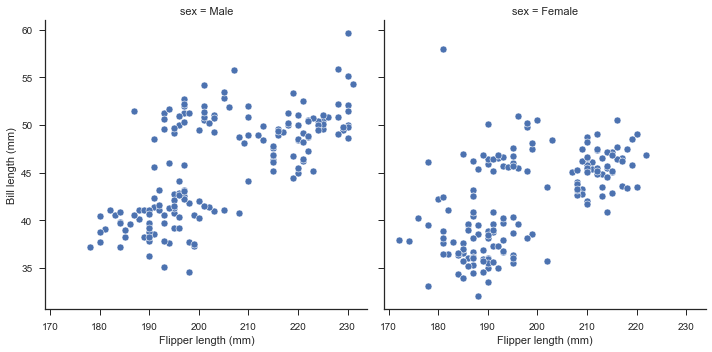

In [24]:
g = sns.relplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", col="sex")
g.set_axis_labels("Flipper length (mm)", "Bill length (mm)")

    虽然方便，但这确实增加了一些额外的复杂性，因为需要记住，此方法不是matplotlib API的一部分，并且仅在使用figure-level function时存在。

### Specifying figure sizes

    要增加或减少 matplotlib 绘图的大小，可以在全局 rcParams 中设置整个图形的宽度和高度，同时设置绘图（例如使用 matplotlib.pyplot.subplots() 的 figsize 参数），或者通过调用图形对象上的方法（例如 matplotlib.Figure.set_size_inches()）。在 seaborn 中使用axes-level function时，适用相同的规则：绘图的大小由它所在的图形的大小和该图中的轴布局决定。

    使用figure-level function时，有几个关键区别。首先，函数本身具有控制图形大小的参数（尽管这些实际上是管理图形的底层 FacetGrid 的参数）。其次，这些参数，height 和 aspect，参数化大小与 matplotlib 中的 width、height 参数化略有不同（使用 seaborn 参数，width = height * apsect）。最重要的是，参数对应于每个子图的大小，而不是整体图的大小。

    为了说明这些方法之间的区别，这里是 matplotlib.pyplot.subplots() 的默认输出，带有一个子图：

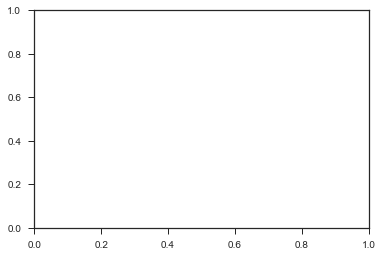

In [25]:
fig, ax = plt.subplots()

    具有多个列的图形将具有相同的总体大小，但轴将被水平挤压以适合空间：


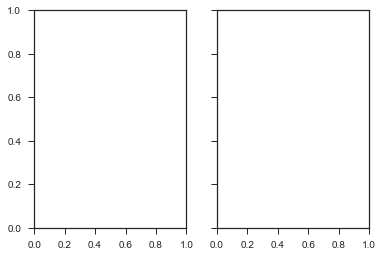

In [26]:
fig, ax = plt.subplots(1, 2, sharey=True)

    相反，由figure-level function创建的绘图将是正方形的。为了演示这一点，让我们直接使用 FacetGrid 设置一个空图。这发生在 relplot（）、displot（） 或 catplot（） 等函数的幕后：

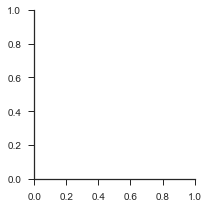

In [27]:
g = sns.FacetGrid(penguins)

    添加其他列时，图形本身将变宽，以便其子图具有相同的大小和形状：

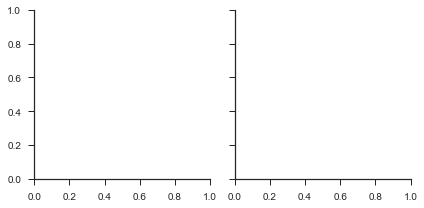

In [28]:
g = sns.FacetGrid(penguins, col="sex")

    你可以调整每个子情节的大小和形状，而无需考虑图中的行和列总数：

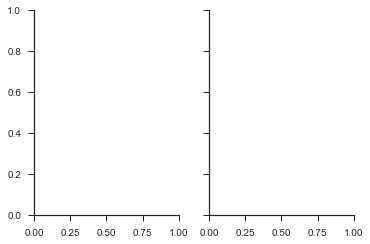

In [29]:
g = sns.FacetGrid(penguins, col="sex", height=3.5, aspect=.75)

    结果是你可以分配faceting变量，而无需停下来考虑如何调整总图形大小。一个缺点是，当您确实想更改图形大小时，您需要记住事情的工作方式与在 matplotlib 中的工作方式略有不同。

### Relative merits of figure-level functions

    以下是我们上面讨论的优缺点的摘要：
    1. 优点：
    通过数据变量轻松faceting
    默认情况下，legend在figure之外
    轻松figure-level自定义
    不同图形大小参数化

    2. 缺点
    函数签名中缺少许多参数
    不能成为更大的 matplotlib 图的一部分
    与 matplotlib 不同的 API
    不同图形大小参数化
        

    总而言之，figure-level function增加了一些额外的复杂性，可能会使初学者更加困惑，但它们的独特功能赋予了它们额外的功能。教程文档主要使用figure-level function，因为它们产生的绘图稍微干净一些，我们通常建议将其用于大多数应用程序。当你需要制作一个复杂，独立的图形来组成多种不同的情节类型时，figure-level function并不是一个好的选择。此时，建议直接使用 matplotlib 设置图形，并使用axes-level function填充各个组件。

## Combining multiple views on the data

    seaborn中的两个重要绘图函数并不完全符合上面讨论的分类方案。
    这些函数（jointplot（） 和 pairplot（））采用来自不同模块的多种图来表示数据集的多个方面。
    这两个图都是figure-level function，默认情况下创建具有多个子图的图形。但是他们使用不同的对象来管理图形：分别是 JointGrid 和 PairGrid。

    jointplot（） 绘制两个变量的关系或联合分布，同时添加分别显示每个变量的单变量分布的边缘轴：

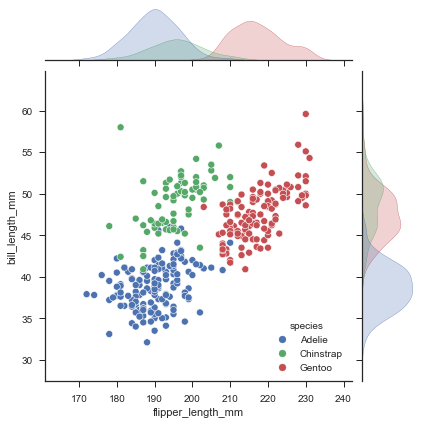

In [30]:
sns.jointplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species")

    pairplot（） 是相似的 - 它结合了联合视图和边际视图 - 但不是专注于单个关系，而是同时可视化每个成对的变量组合：

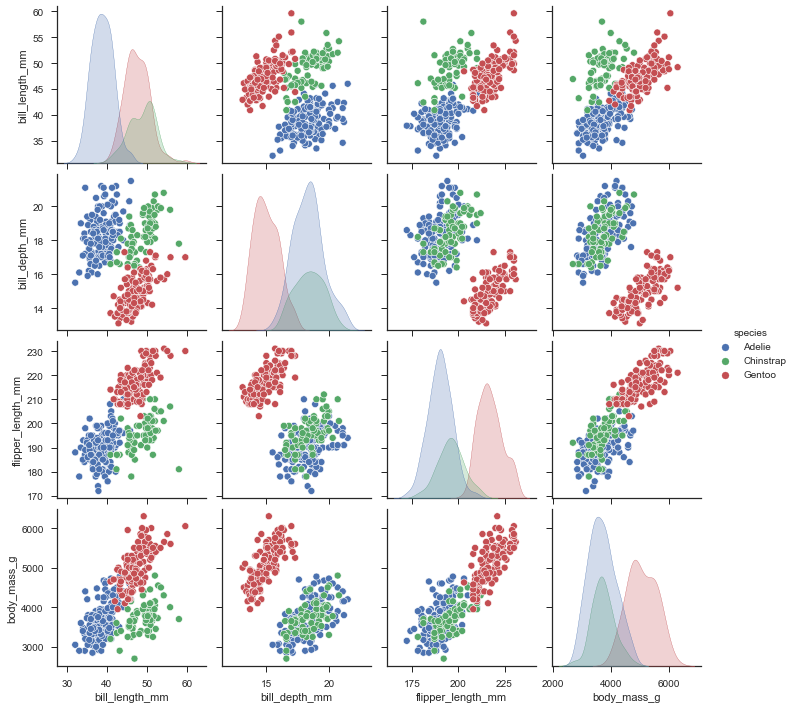

In [31]:
sns.pairplot(data=penguins, hue="species")

    在幕后，这些函数使用之前已经用过的axes-level function（scatterplot（） 和 kdeplot（）），并且它们还有一个 kind 参数，可让快速交换不同的表示形式：

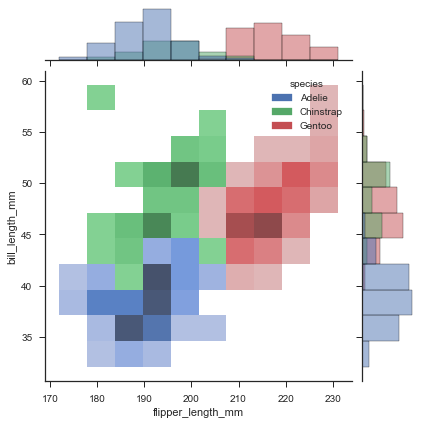

In [32]:
sns.jointplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species", kind="hist")